In [ ]:
!pip install xgboost tensorflow
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from google.colab import drive # for loading file from google drive
drive.mount('/content/drive')

In [ ]:
# load your dataset
file_path = '/content/drive/MyDrive/creditcard.csv'
data = pd.read_csv(file_path)

In [ ]:
# separate features and target variable
X = data.drop('Class', axis=1)
y = data['Class']

In [ ]:
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [ ]:
# standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# display dataset info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

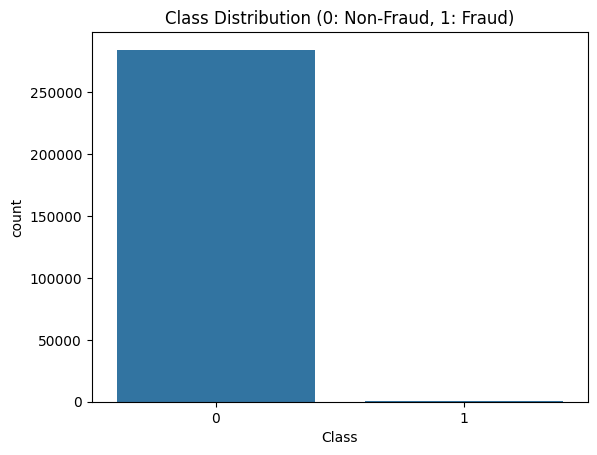

In [ ]:
# display class distribution
sns.countplot(x='Class', data=data)
plt.title('Class Distribution (0: Non-Fraud, 1: Fraud)')
plt.show()

Ann Model

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [ ]:
# build the ANN model
ann_model = Sequential()
ann_model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Input layer
ann_model.add(Dropout(0.5))
ann_model.add(Dense(16, activation='relu'))  # Hidden layer
ann_model.add(Dropout(0.5))
ann_model.add(Dense(1, activation='sigmoid'))  # Output layer

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the model
ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model
history = ann_model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9849 - loss: 0.0639 - val_accuracy: 0.9993 - val_loss: 0.0059
Epoch 2/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 19s 3ms/step - accuracy: 0.9990 - loss: 0.0062 - val_accuracy: 0.9992 - val_loss: 0.0054
Epoch 3/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 18s 4ms/step - accuracy: 0.9990 - loss: 0.0051 - val_accuracy: 0.9989 - val_loss: 0.0056
Epoch 4/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 28s 5ms/step - accuracy: 0.9991 - loss: 0.0044 - val_accuracy: 0.9990 - val_loss: 0.0053
Epoch 5/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 28s 3ms/step - accuracy: 0.9991 - loss: 0.0045 - val_accuracy: 0.9992 - val_loss: 0.0048
Epoch 6/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 27s 4ms/step - accuracy: 0.9992 - loss: 0.0036 - val_accuracy: 0.9991 - val_loss: 0.0051
Epoch 7/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9991 - val_loss: 0.0054
Epoch 8/10
4985/4985 ━━━━━━━━━━━━━━━━━━━━ 13s 3ms/step - accuracy: 0.9990 - loss: 0

In [ ]:
# evaluate on test data
ann_pred = ann_model.predict(X_test).round()
print('ANN Model Report:')
print(classification_report(y_test, ann_pred))
print(f'Accuracy: {accuracy_score(y_test, ann_pred)}')

2671/2671 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
ANN Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.92      0.65      0.76       148

    accuracy                           1.00     85443
   macro avg       0.96      0.82      0.88     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9992977774656788


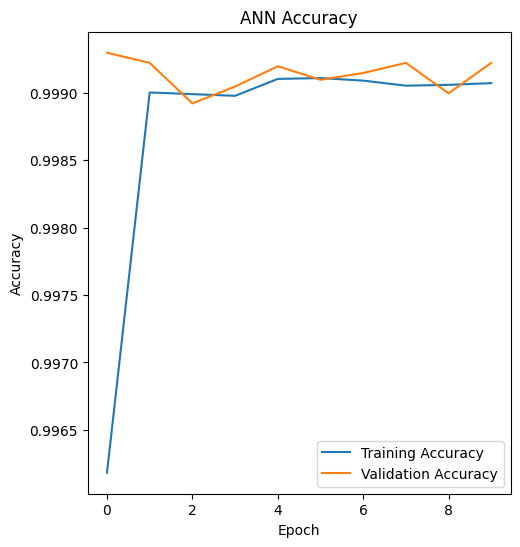

In [ ]:
# plot training & validation accuracy and loss over epochs
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('ANN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ANN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

XGBoost Model


In [ ]:
import xgboost as xgb

In [ ]:
# initialize the XGBoost model
xgb_model = xgb.XGBClassifier()

In [ ]:
# train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
# make predictions
xgb_pred = xgb_model.predict(X_test)

In [ ]:
# evaluation
print('XGBoost Model Report:')
print(classification_report(y_test, xgb_pred))
print(f'Accuracy: {accuracy_score(y_test, xgb_pred)}')

XGBoost Model Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.94      0.75      0.83       148

    accuracy                           1.00     85443
   macro avg       0.97      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy: 0.9994850368081645


Confusion Matrix and Visualization for Both Models

In [ ]:
# plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'{title} Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

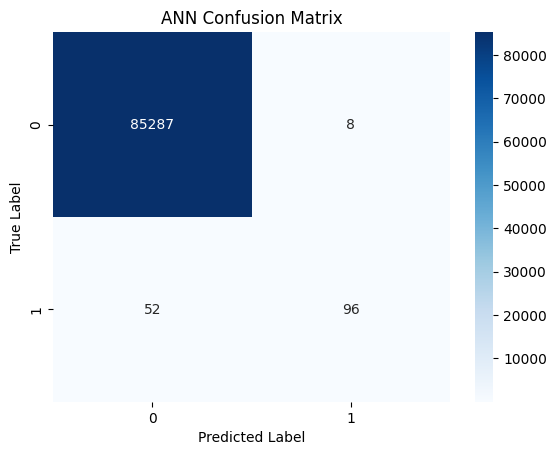

In [ ]:
# ANN Confusion Matrix
plot_confusion_matrix(y_test, ann_pred, 'ANN')

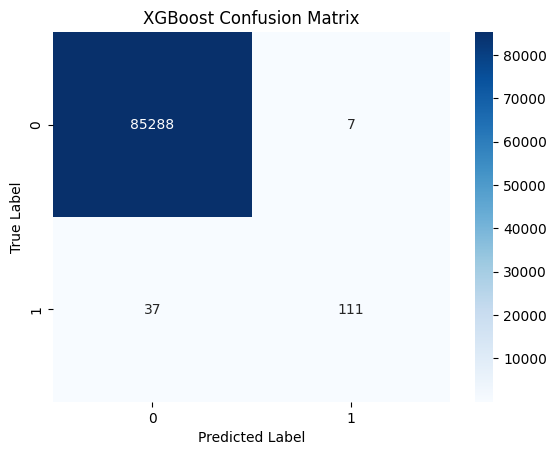

In [ ]:
# XGBoost Confusion Matrix
plot_confusion_matrix(y_test, xgb_pred, 'XGBoost')